In [11]:
!pip install pillow
!pip install keras
!pip install sagemaker-tensorflow
!pip install cmake tensorflow

     |████████████████████████████████| 16.5MB 29.6MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/85/d4/c0cd1057b331bc38b65478302114194bd8e1b9c2bbc06e300935c0e93d90/tensorflow-2.1.0-cp36-cp36m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/dc/29/162476fd44203116e7980cfbd9352eef9db37c49445d1fec35509022f6aa/scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/c3/88/97eef84f48fa04fbd6750e62dcceafba6c63c81b7ac1420856c8dcc0a3f9/astor-0.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c3/fd/1e86bc4837cc9a3a5faf3db9b1854aa04ad35b5f381f9648fbe81a6f94e4/google_pasta-0.1.8-py3-none-any.whl
Processing /home/ec2-user/.cache/pip/wheels/d7/de/2e/efa132238792efb6459a96e85916ef8597fcb3d2ae51590dfd/wrapt-1.11.2-cp36-cp36m-linux_x86_64.whl
Processing /home/ec2-user/.cache/pip/wheels/2c/b1/94/43d03e130b929aae7ba3f8d15cbd7bc0d1cb5bb38a5c721833/opt_einsum-3.1.0-cp36-none-a

In [3]:
!pip install --upgrade pip

    100% |████████████████████████████████| 1.4MB 19.7MB/s ta 0:00:01
  Found existing installation: pip 10.0.1
    Uninstalling pip-10.0.1:
      Successfully uninstalled pip-10.0.1


In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import os
from PIL import Image

Using TensorFlow backend.


In [4]:
# Making images black and white by changing all pixels to 0 or 255 depending on whether
## the pixel value is greater or less than the threshold

def binarize_image(img_path, threshold):
    """Binarize an image."""
    image_file = Image.open(img_path)
    image = image_file.convert('L')  # convert image to monochrome
    image = np.array(image)
    for i in range(len(image)):
        for j in range(len(image[0])):
            if image[i][j] > threshold:
                image[i][j] = 255
            else:
                image[i][j] = 0
    return image

In [2124]:
data = binarize_image(img_path="data/Cracks/train/Dutch/Dutch1,218.png", threshold=106)

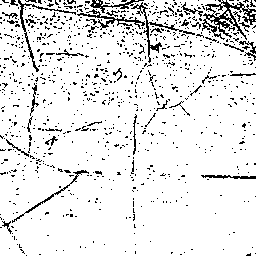

In [2125]:
Image.fromarray(data)

In [2126]:
bwimage = Image.fromarray(data)

In [2127]:
bwimage.save('data/bwcracks/train/Dutch/Dutch1,218.png')

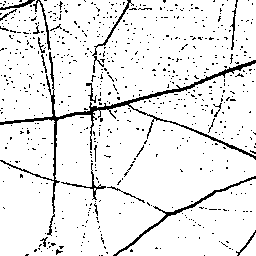

In [1972]:
Image.open('data/bwcracks/train/Dutch/Dutch1,200.png')

In [3]:
# Directory path
train_data_dir = 'data/Cracks/train'
test_data_dir = 'data/Cracks/test'

# Get all the data in the directory data/validation, and reshape them
test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(256, 256), batch_size=463, color_mode='grayscale')

# Get all the data in the directory data/train, and reshape them
train_generator = ImageDataGenerator(zca_whitening=True).flow_from_directory(
        train_data_dir, 
        target_size=(256, 256), batch_size=1854, color_mode='grayscale')

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)

Found 463 images belonging to 2 classes.
Found 1854 images belonging to 2 classes.


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:735: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


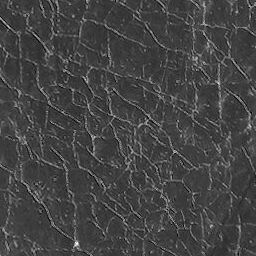

In [4]:
# Previewing an image
array_to_img(train_images[15])

In [6]:
# Checking shape of data
print('train data shape:', np.shape(train_images), np.shape(train_labels))
print('test data shape:', np.shape(test_images), np.shape(test_labels))

train data shape: (1854, 256, 256, 1) (1854, 2)
test data shape: (463, 256, 256, 1) (463, 2)


In [7]:
# Unrowing/reshaping
train_img = train_images.reshape(train_images.shape[0], -1)
print('train_img:', np.shape(train_img))

test_img = test_images.reshape(test_images.shape[0], -1)
print('test_img:', np.shape(test_img))

train_img: (1854, 65536)
test_img: (463, 65536)


In [8]:
# Looking at the labels
train_labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [9]:
train_generator.class_indices

{'Dutch': 0, 'Flemish': 1}

In [10]:
# Transposing the labels
train_y = np.reshape(train_labels[:,0], (1854,1))
print('train labels final:', np.shape(train_y))

test_y = np.reshape(test_labels[:,0], (463,1))
print('test labels final:', np.shape(test_y))

train labels final: (1854, 1)
test labels final: (463, 1)
